* El siguiente Notebook fue realizado en el marco de la resolución del Reto del *Área 3: Exploración básica y limpieza de datos con Python* del Bootcamp de Análisis de Datos con Python de NTT Data Foundation. 


# Indice:

### **0. Metodología de trabajo**

### **1. Análisis exploratório de los datos de estadisticas_community_areas.csv**
     
     1.0 Datos
     1.1 Diccionario de datos
     1.2 Objetivos generales
     1.3 Importamos librerias y cargamos el dataframe.
     1.4 Entendiendo a los datos
     1.5 Reordenamiento las columnas
     1.6 Valores nulos
     1.7 Tipos de variables
     1.8 Columnas irrelevantes
     1.9 Outliers
     1.10 Transformación de variables
     1.11 Selección de variables
     1.12 Filas duplicadas

### **2. Modelo**



### **3. Anexo - Respuestas**
    
    Ejercicio 1
    Ejercicio 2     

# 1. Análisis exploratório de los datos

Para entender mejor los datos, identificar problemas y limitaciones, y para prepararlos para un análisis estadístico o un modelado más avanzado, se procede a realizar el siguiente Análisis exploratório de los datos facilidatos.

## 1.0 Nuestros datos

Este conjunto de datos refleja los incidentes reportados de delitos (con la excepción de los asesinatos en los que existen datos para cada víctima) que ocurrieron en la ciudad de Chicago desde 2001 hasta el presente, menos los siete días más recientes. Los datos se extraen del sistema CLEAR (Citizen Law Enforcement Analysis and Reporting) del Departamento de Policía de Chicago. Con el fin de proteger la privacidad de las víctimas de delitos, las direcciones se muestran solo a nivel de bloque y no se identifican ubicaciones específicas. Si tiene preguntas sobre este conjunto de datos, puede comunicarse con la División de Análisis y Cumplimiento de Datos del Departamento de Policía de Chicago en DFA@ChicagoPolice.org.

## 1.1 Diccionario de datos

Las variables disponibles en el dataset son las siguientes:

* **Community Area:** Número entero que identifica al área comunitaria.
* **Name:** Nombre del área comunitaria.
* **Population:** Número de habitantes en ese área comunitaria.
* **Latinos:** Índice de personas latinas residentes en el área comunitaria.
* **Blacks:** Índice de personas negras residentes en el área comunitaria.
* **White:** Índice de personas blancas residentes en el área comunitaria.
* **Asian:** Índice de personas asiáticas residentes en el área comunitaria.
* **Other:** Índice de personas de otras razas residentes en el área comunitaria.
* **NUM_AFFORD_RENTAL_HOUSES:** Número de proyectos de casas asequibles en 
el área comunitaria.
* **NUM_HOSPITALES** Número de hospitales en el área comunitaria.
* **NUM_SCHOOLS:** Número de colegios en el área comunitaria.
* **Ingresos:** Nivel de ingresos medios per cápita de los residentes de dicha área 
comunitaria.
* **Criminalidad_100000:** Índice de criminalidad calculado por cada 100.000 personas 
en ese área comunitaria.
* **Consumo_electrico:** Nivel de consumo eléctrico medio del área comunitaria.

## 1.2 Objetivos generales

* Explicar y modelar las posibles razones detrás de los índices de criminalidad.
* Establecer si las distintas variables de las que disponemos tienen influencia en la criminalidad de la ciudad. 

## 1.3 Importamos librerias y cargamos el dataframe.

In [182]:
# Librerias para exploración y gráficas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [183]:
# Configuracion
import warnings  

# Para que pandas muestre todas las columnas
pd.options.display.max_columns = None

# Para no tener warmings
warnings.filterwarnings("ignore")

In [184]:
# Ruta del archivo csv
ruta1 = "estadisticas_community_areas.csv"

# Lectura a los archivos csv
datos1 = pd.read_csv(ruta1, sep = ',')

# Se crea el dataframe
df1 = pd.DataFrame(datos1)

## 1.4 Entendiendo a los datos
* Shape
* Head and Tail
* Columnas
* Info
* Describe
* Gráficas de pares
* Distribución de las variables

Primero se observa la dimensión de los datos

In [185]:
# Dimensión de los datos
df1.shape

(77, 14)

El dataframe tiene 77 filas y 14 columnas.

Primeras 5 filas de los datos:

In [186]:
# Primeras 5 filas del dataframe
df1.head()

,Community_Area,Name,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000,Consumo_Electrico
0,1,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036,10,0.0,9,525.541,Medio Bajo
1,2,West Ridge,71942,47323,0.204,0.111,0.427,0.225,0.032,6,0.0,10,316.922,Medio Bajo
2,3,Uptown,56362,40324,0.142,0.200,0.516,0.114,0.028,33,4.0,8,565.984,Medio
3,4,Lincoln Square,39493,57749,0.191,0.038,0.631,0.111,0.029,6,3.0,9,357.025,Medio Bajo
4,5,North Center,31867,81524,0.136,0.023,0.773,0.045,0.022,5,0.0,10,310.666,Medio Bajo


Y las últimas 5:

In [187]:
# Ultimas 5 filas del dataframe
df1.tail()

,Community_Area,Name,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000,Consumo_Electrico
72,73,Washington Heights,26493,42053,0.010,0.974,0.005,0.000,0.012,3,0.0,10,860.605,Bajo
73,74,Mount Greenwood,19093,80505,0.072,0.052,0.860,0.007,0.010,0,0.0,9,319.489,Medio Bajo
74,75,Morgan Park,22544,56886,0.027,0.667,0.287,0.004,0.014,0,0.0,8,660.930,Medio Bajo
75,76,O'Hare,12756,49601,0.095,0.032,0.772,0.083,0.019,0,0.0,7,870.179,Muy Alto
76,77,Edgewater,56521,43331,0.165,0.143,0.547,0.116,0.029,7,1.0,6,316.696,Medio Alto


Observemos las columnas (variables) del dataframe:

In [188]:
# Columnas del dataframe
df1.columns

Index(['Community_Area', 'Name', 'Population', 'Ingresos', 'Latinos', 'Blacks',
       'White', 'Asian', 'Other', 'Num_Afford_Rental_Houses', 'Num_Hospitals',
       'Num_Schools', 'Criminalidad_100000', 'Consumo_Electrico'],
      dtype='object')

Se realiza un info para ver la cantidad de valores nulos y tipos de datos en cada columna:

In [189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Community_Area            77 non-null     int64  
 1   Name                      77 non-null     object 
 2   Population                77 non-null     int64  
 3   Ingresos                  77 non-null     int64  
 4   Latinos                   77 non-null     float64
 5   Blacks                    77 non-null     float64
 6   White                     77 non-null     float64
 7   Asian                     77 non-null     float64
 8   Other                     77 non-null     float64
 9   Num_Afford_Rental_Houses  77 non-null     int64  
 10  Num_Hospitals             63 non-null     float64
 11  Num_Schools               77 non-null     int64  
 12  Criminalidad_100000       77 non-null     float64
 13  Consumo_Electrico         76 non-null     object 
dtypes: float64(7

Hay: 

* 7 variables de tipo **float64**.
* 5 de tipo **int64**.  
* 2 tipo **object**. 
* 14 columnas y 77 filas. 
* valores nulos en las columnas **"Num_Hospitals"** y en **"Consumo_Electrico"**.

Principales estadísticas de las variables numéricas:

In [190]:
df1.describe(include = 'all').round(2)

,Community_Area,Name,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000,Consumo_Electrico
count,77.00,77,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,63.00,77.00,77.00,76
unique,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,McKinley Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medio Bajo
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44
mean,39.69,NaN,33782.21,45453.99,0.26,0.39,0.27,0.06,0.02,7.04,0.59,8.26,932.73,NaN
std,22.16,NaN,21679.85,17338.42,0.28,0.40,0.28,0.10,0.01,10.10,0.96,3.06,1171.47,NaN
min,1.00,NaN,0.00,13380.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,178.78,NaN
25%,21.00,NaN,18001.00,32553.00,0.04,0.03,0.02,0.00,0.01,1.00,0.00,6.00,389.87,NaN
50%,40.00,NaN,30654.00,42382.00,0.12,0.14,0.16,0.01,0.01,3.00,0.00,9.00,594.14,NaN
75%,59.00,NaN,45368.00,54123.00,0.46,0.91,0.49,0.07,0.02,7.00,1.00,10.00,1119.45,NaN


* La variable "Community_Area" es única para cada registro. 

- **Community_Area:** Se sospecha que puede ser una variable única para cada registro. Por lo que se transformará a categórica para poder ver cuantos valores únicos tiene.
- **Name:** Tiene 76 valores únicos de 77, por lo que debe haber un valor duplicado en esta columna.
- **Population:** Llama la atención el valor mínimo de 0, y se considera que dicho registro debería ser modificado posteriormente. Probablemente este valor esté afectando a la distribución de los datos.
- **Ingresos:** Gracias a los cuartiles, se observa que los datos en esta columna no tienden a agruparse.
- **Indices_L_B_W_A_O:** Se considerará una posterior transformación de estos índices en función de las dimensiones del target.
- **Criminalidad_100000:** Se cambiará la posición de esta columna para que quede al final. Además, se observa la posibilidad de que tenga un outlier de 9999.00.
- **Consumo_Electrico:** En un principio se pensó en eliminar esta columna, pero se notó su importancia (-luz + delincuencia), por lo que se decidió cambiar su posición para que visualmente tenga más sentido.

<Figure size 1200x600 with 0 Axes>

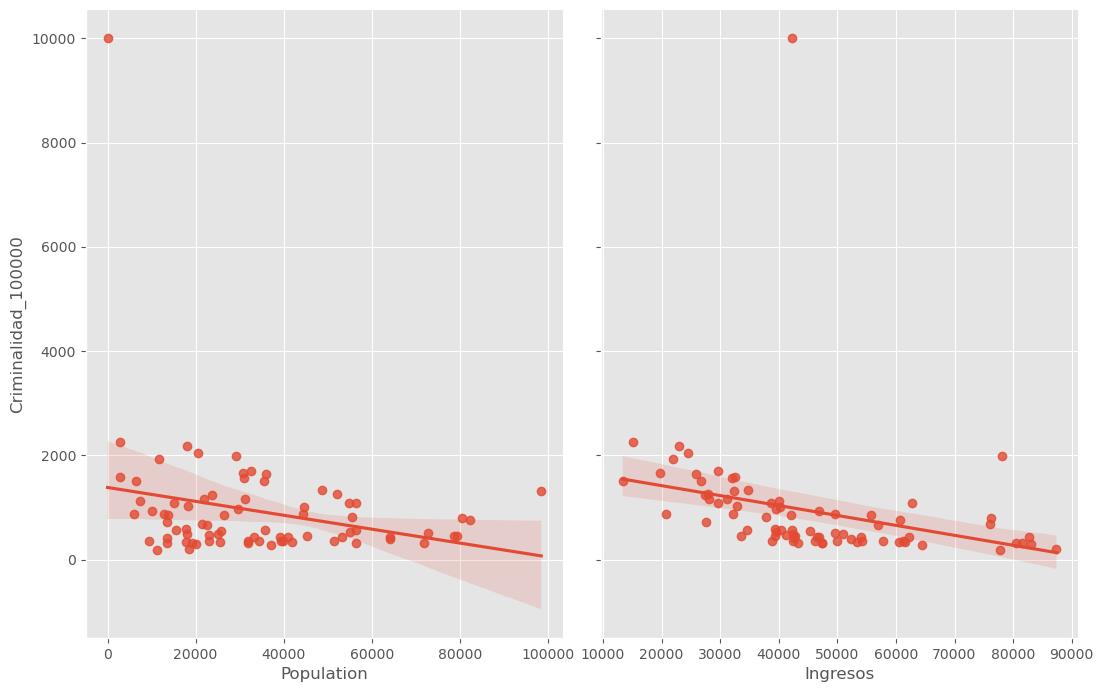

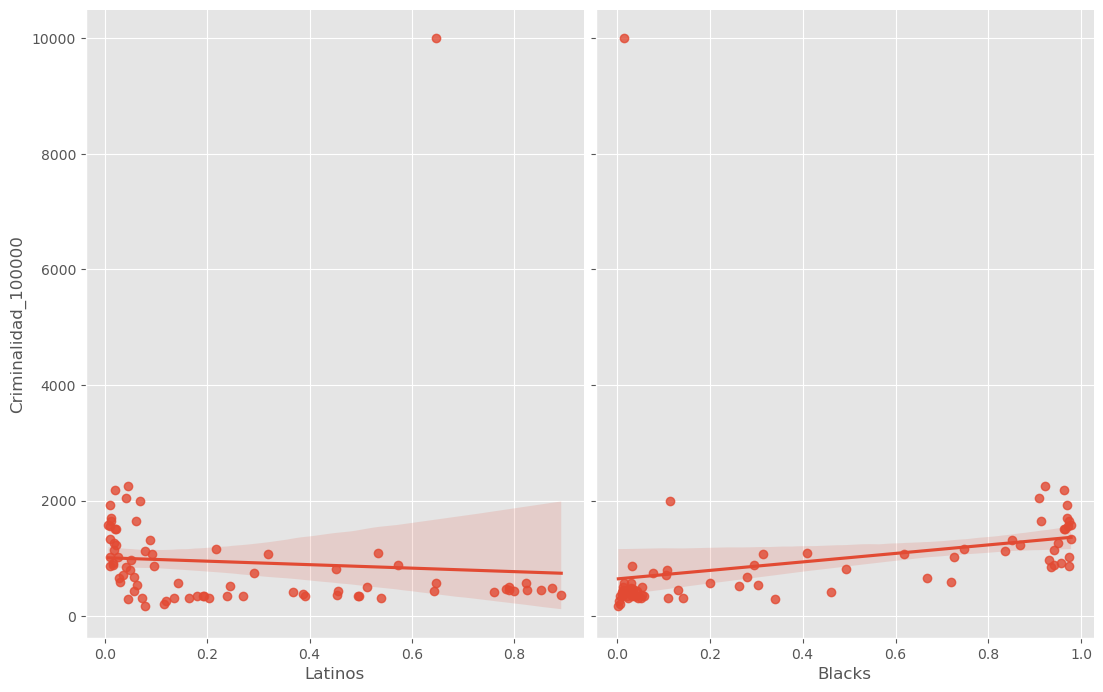

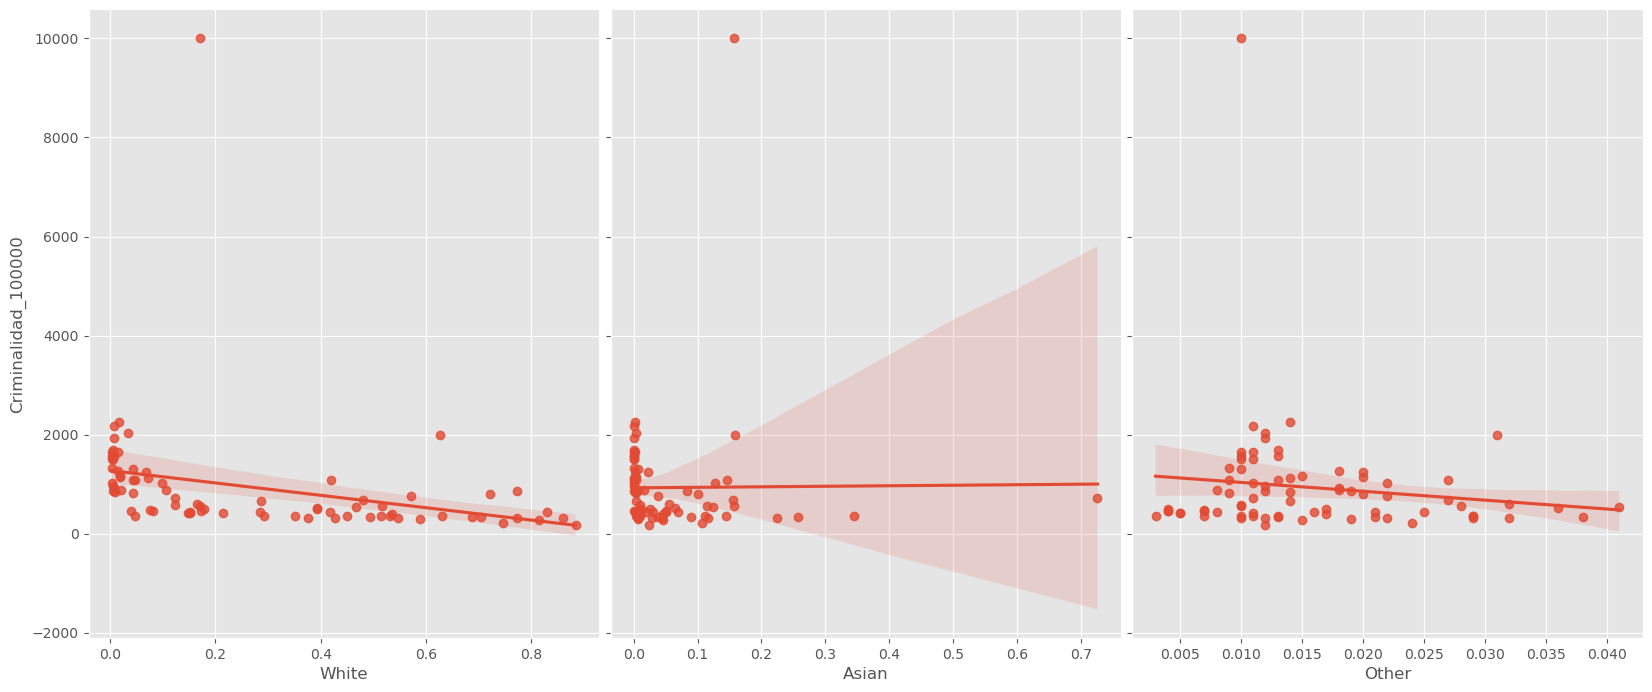

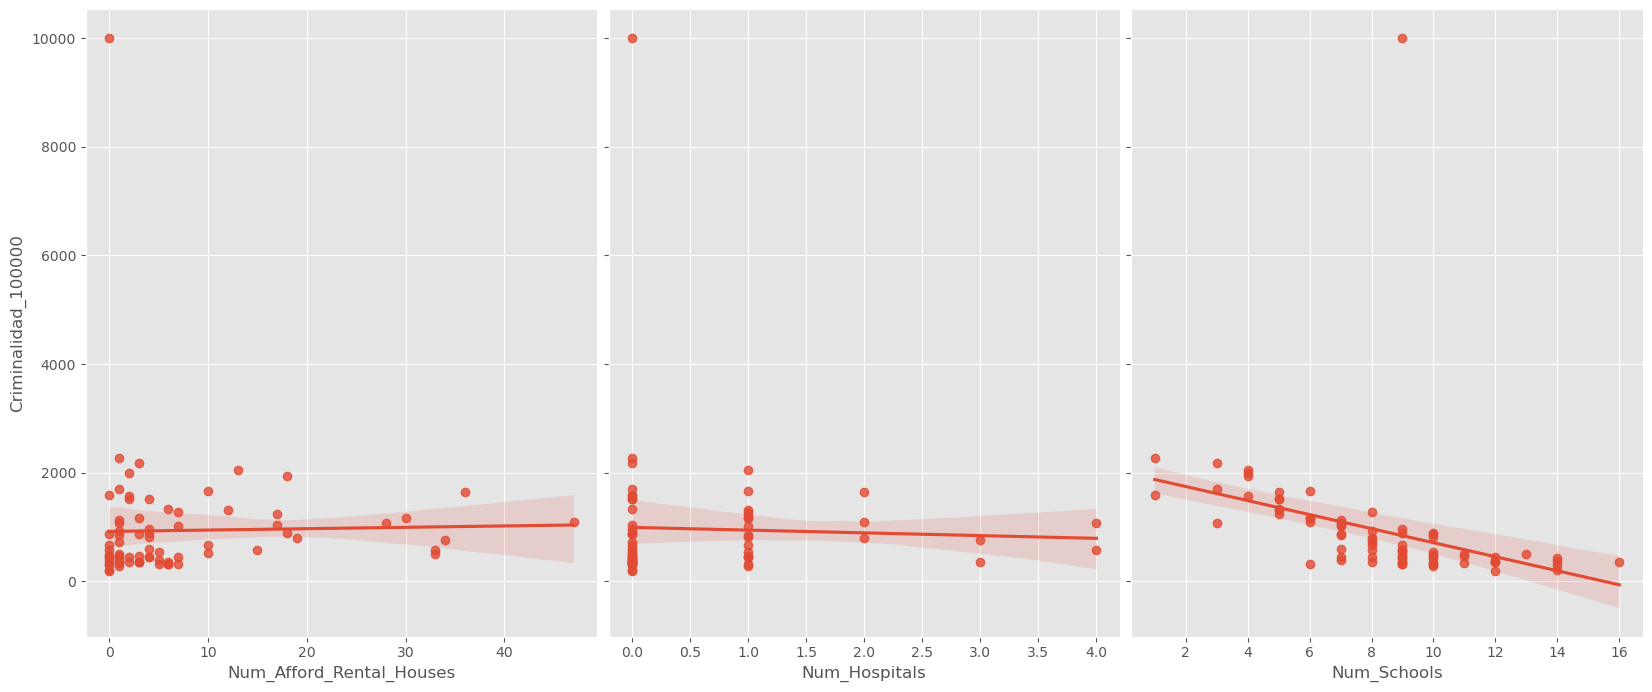

In [191]:
# Gráficas de pares con seaborn 
plt.figure(figsize=(12,6))
sns.pairplot(df1, x_vars=["Population", "Ingresos"], y_vars='Criminalidad_100000', 
             height=7, aspect=0.8,kind = 'reg')

sns.pairplot(df1, x_vars=["Latinos", "Blacks"], y_vars='Criminalidad_100000', 
             height=7, aspect=0.8,kind = 'reg')

sns.pairplot(df1, x_vars=["White", "Asian", "Other"], y_vars='Criminalidad_100000', 
             height=7, aspect=0.8,kind = 'reg')

sns.pairplot(df1, x_vars=["Num_Afford_Rental_Houses", "Num_Hospitals", 
"Num_Schools"], y_vars='Criminalidad_100000', height=7, aspect=0.8,kind = 'reg')

plt.show()

- Se identifica una marcada correlación entre las variables **"Population," "Ingresos," "Blacks," "White," y "Num_Schools" con la variable objetivo.**
- En todas las gráficas se puede observar el outlier (9999) de la variable objetivo como un punto por encima del resto.
- Se observa una mayor dispersión en las variables **"Num_Afford_Rental_Houses" y "Other."**

In [192]:
# Se crea las funciones necesarias
def mult_latinos(x):
    return x.Latinos * x.Population

def mult_blacks(x):
    return x.Blacks * x.Population

def mult_white(x):
    return x.White * x.Population

def mult_Asian(x):
    return x.Asian * x.Population

def mult_Other(x):
    return x.Other * x.Population

In [193]:
# Se aplica las funciones en las columnas indicadas
df1["Latinos"] = df1.apply(mult_latinos, axis = 1)
df1["Blacks"] = df1.apply(mult_blacks, axis = 1)
df1["White"] = df1.apply(mult_white, axis = 1)
df1["Asian"] = df1.apply(mult_Asian, axis = 1)
df1["Other"] = df1.apply(mult_Other, axis = 1)

In [194]:
# Mostrar el dataframe
df1

,Community_Area,Name,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000,Consumo_Electrico
0,1,Rogers Park,54991,39482,13417.804,14462.633,21611.463,3519.424,1979.676,10,0.0,9,525.541,Medio Bajo
1,2,West Ridge,71942,47323,14676.168,7985.562,30719.234,16186.950,2302.144,6,0.0,10,316.922,Medio Bajo
2,3,Uptown,56362,40324,8003.404,11272.400,29082.792,6425.268,1578.136,33,4.0,8,565.984,Medio
3,4,Lincoln Square,39493,57749,7543.163,1500.734,24920.083,4383.723,1145.297,6,3.0,9,357.025,Medio Bajo
4,5,North Center,31867,81524,4333.912,732.941,24633.191,1434.015,701.074,5,0.0,10,310.666,Medio Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,42053,264.930,25804.182,132.465,0.000,317.916,3,0.0,10,860.605,Bajo
73,74,Mount Greenwood,19093,80505,1374.696,992.836,16419.980,133.651,190.930,0,0.0,9,319.489,Medio Bajo
74,75,Morgan Park,22544,56886,608.688,15036.848,6470.128,90.176,315.616,0,0.0,8,660.930,Medio Bajo
75,76,O'Hare,12756,49601,1211.820,408.192,9847.632,1058.748,242.364,0,0.0,7,870.179,Muy Alto


In [195]:
# Se observa cambiaron los valores mínimos y máximos de los índices
df1.describe()

,Community_Area,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,63.000000,77.000000,77.000000
mean,39.688312,33782.207792,45453.987013,10021.018221,11281.237922,10115.284338,1807.272870,555.236805,7.038961,0.587302,8.259740,932.729766
std,22.157486,21679.849682,17338.416475,13713.559306,14747.056590,13049.823000,2990.304281,516.032525,10.103988,0.961097,3.062518,1171.466340
min,1.000000,0.000000,13380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,178.779000
25%,21.000000,18001.000000,32553.000000,566.292000,833.612000,520.075000,47.130000,183.330000,1.000000,0.000000,6.000000,389.870000
50%,40.000000,30654.000000,42382.000000,4333.912000,6123.700000,4232.274000,287.567000,401.236000,3.000000,0.000000,9.000000,594.137000
75%,59.000000,45368.000000,54123.000000,14306.110000,17287.515000,15050.264000,2316.226000,629.944000,7.000000,1.000000,10.000000,1119.454000
max,77.000000,98514.000000,87394.000000,65491.888000,83835.414000,58028.964000,16186.950000,2302.144000,47.000000,4.000000,16.000000,9999.000000


Observar ahora que distribución tienen las variables con un histograma:

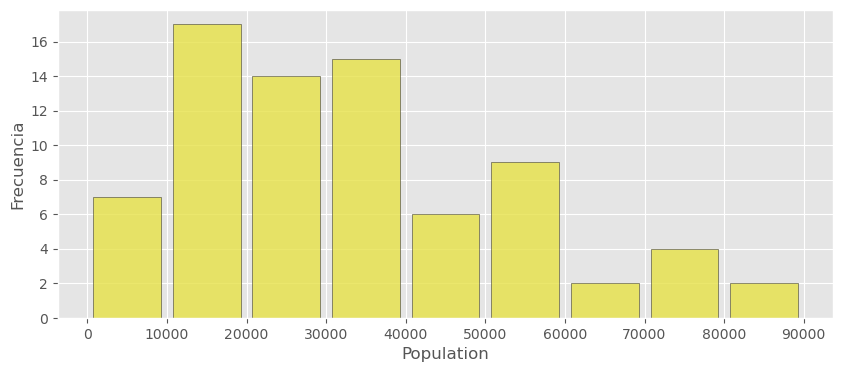

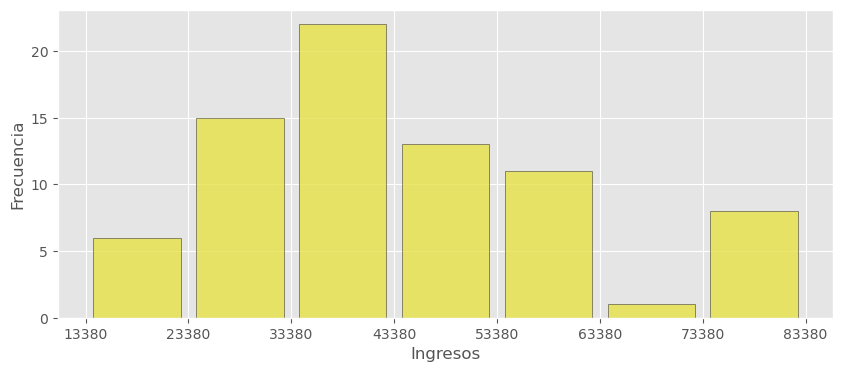

In [196]:
# Lista de columnas
columnas1 = ["Population", 
             "Ingresos"
            ]

# Histogramas
for col in columnas1:
    
    plt.figure(figsize=(10,4))
    intervalo1 = range(min(df1[col]), max(df1[col]) + 1, 10000)
    
    # Creo el histograma
    plt.hist(df1[col],bins = intervalo1, alpha = 0.8, color = '#E7E247', ec = '#3D3B30', rwidth = 0.85)
    plt.ylabel('Frecuencia')
    plt.xlabel(f'{col}')
    plt.xticks(intervalo1)
    plt.show()


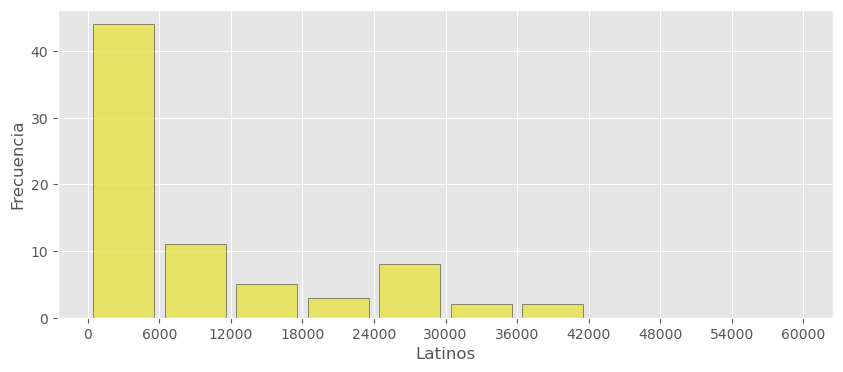

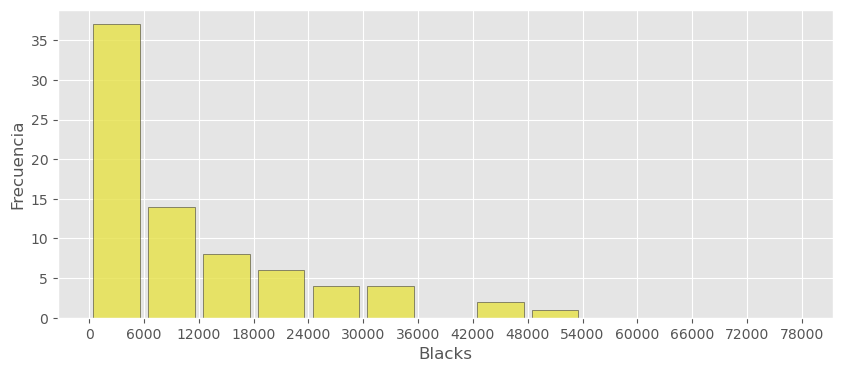

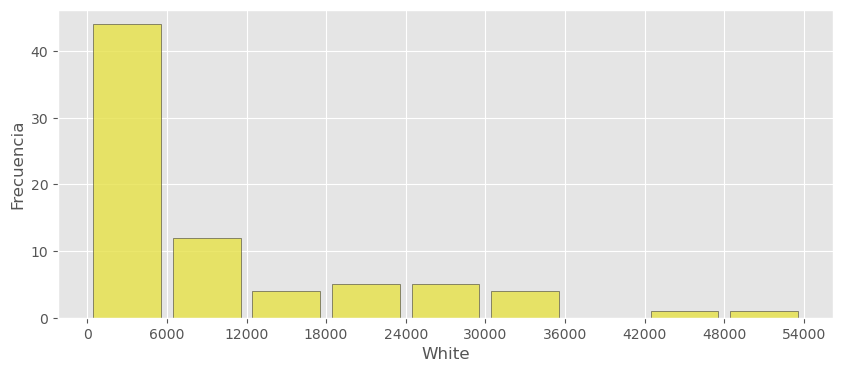

In [197]:
# Lista de columnas
columnas2 = ["Latinos", 
             "Blacks",
             "White"
            ]


# Histogramas
for col in columnas2:
    
    plt.figure(figsize=(10,4))
    intervalo2 = range(int(min(df1[col])), int(max(df1[col])) + 1, 6000)
    
    # Creo el histograma
    plt.hist(df1[col],bins = intervalo2, alpha = 0.8, color = '#E7E247', ec = '#3D3B30', rwidth = 0.85)
    plt.ylabel('Frecuencia')
    plt.xlabel(f'{col}')
    plt.xticks(intervalo2)
    plt.show()

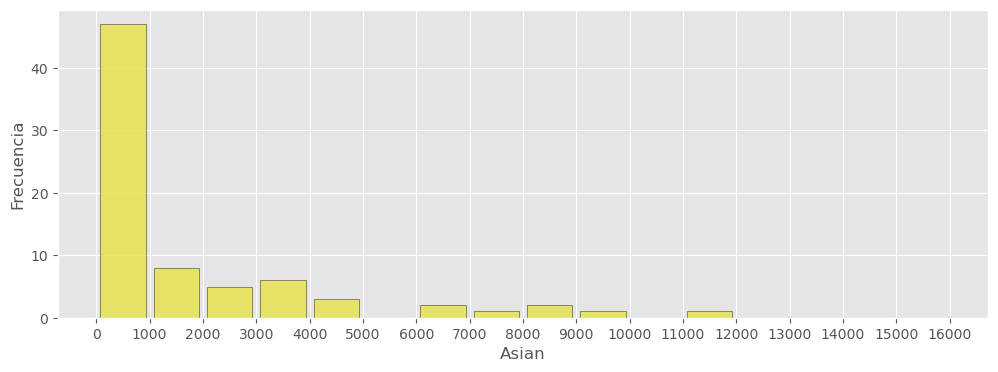

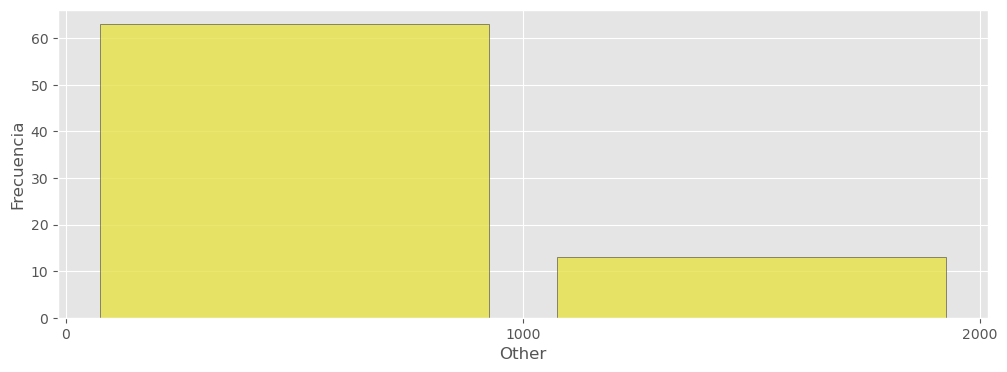

In [198]:
# Lista de columnas
columnas3 = ["Asian", 
             "Other"
            ]

# Histogramas
for col in columnas3:
    
    plt.figure(figsize=(12,4))
    intervalo3 = range(int(min(df1[col])), int(max(df1[col])) + 1, 1000)
    
    # Creo el histograma
    plt.hist(df1[col],bins = intervalo3, alpha = 0.8, color = '#E7E247', ec = '#3D3B30', rwidth = 0.85)
    plt.ylabel('Frecuencia')
    plt.xlabel(f'{col}')
    plt.xticks(intervalo3)
    plt.show()

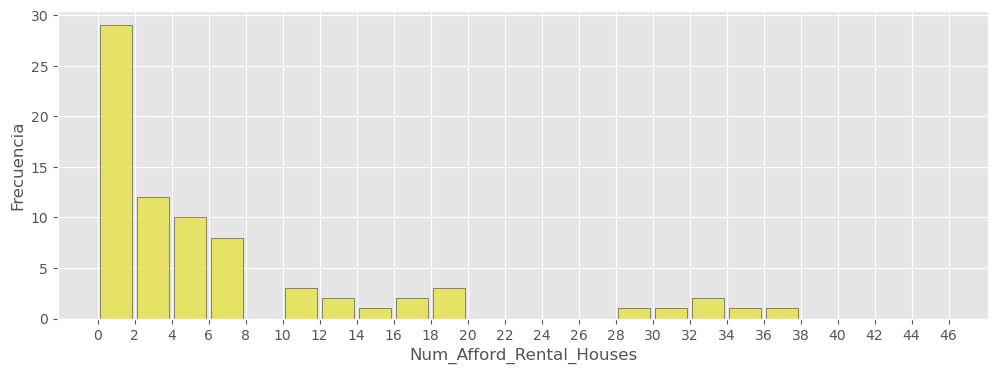

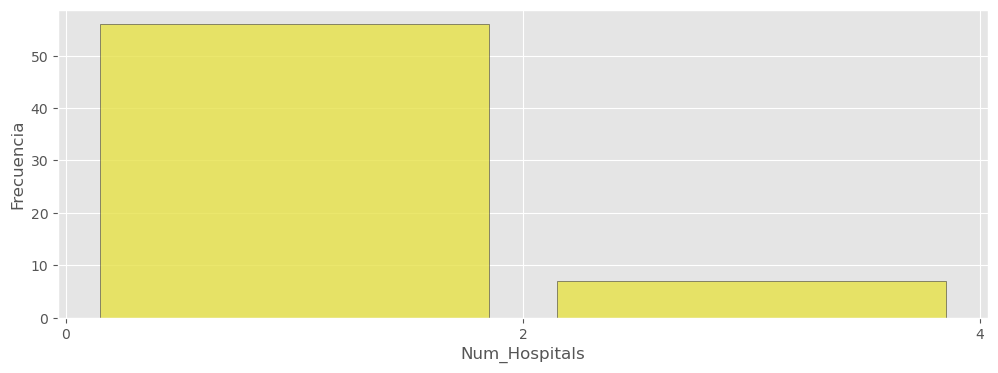

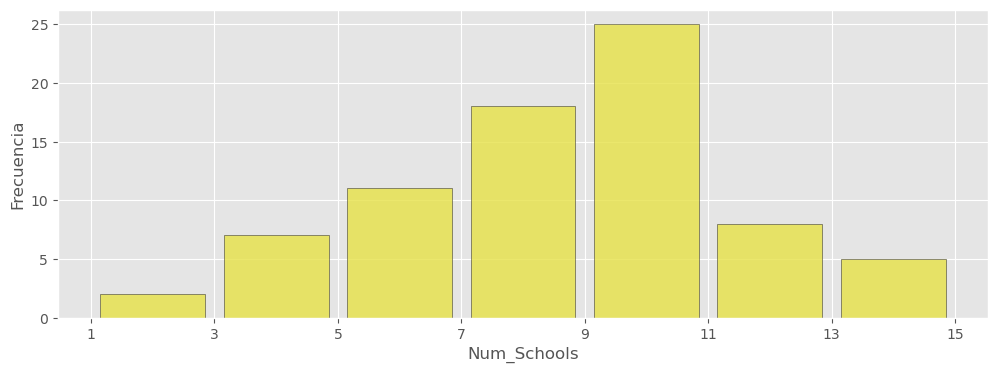

In [199]:
# Lista de columnas
columnas4 = ["Num_Afford_Rental_Houses", 
             "Num_Hospitals",
             "Num_Schools"
            ]

# Histogramas
for col in columnas4:
    
    plt.figure(figsize=(12,4))
    intervalo4 = range(int(min(df1[col])), int(max(df1[col])) + 1, 2)
    
    # Creo el histograma
    plt.hist(df1[col],bins = intervalo4, alpha = 0.8, color = '#E7E247', ec = '#3D3B30', rwidth = 0.85)
    plt.ylabel('Frecuencia')
    plt.xlabel(f'{col}')
    plt.xticks(intervalo4)
    plt.show()

* Se puede observar que las variables **"Latinos," "White," "Blacks," "Asian," "Other," "Num_Afford_Rental_Houses,"** y "Num_Hospitals" muestran una distribución exponencial, lo que indica que no hay mucha dispersión en dichas variables y que los valores se acumulan en un rango determinado.

* Por otro lado, las columnas **"Population," "Ingresos," y "Num_Schools"** presentan distribuciones normales.

In [200]:
# Clasificación de las areas comunitarias
df1["Ingresos"].loc[df1["Ingresos"] < 32553] = 1
df1["Ingresos"].loc[(df1['Ingresos'] >= 32553) & (df1['Ingresos'] < 42382)] = 2
df1["Ingresos"].loc[(df1['Ingresos'] >= 42382) & (df1['Ingresos'] < 54123)] = 3
df1["Ingresos"].loc[(df1['Ingresos'] >= 54123) & (df1['Ingresos'] <= 87394)] = 4

In [201]:
# Quedando la columna "Ingresos" de la siguiente manera
df1

,Community_Area,Name,Population,Ingresos,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Criminalidad_100000,Consumo_Electrico
0,1,Rogers Park,54991,2,13417.804,14462.633,21611.463,3519.424,1979.676,10,0.0,9,525.541,Medio Bajo
1,2,West Ridge,71942,3,14676.168,7985.562,30719.234,16186.950,2302.144,6,0.0,10,316.922,Medio Bajo
2,3,Uptown,56362,2,8003.404,11272.400,29082.792,6425.268,1578.136,33,4.0,8,565.984,Medio
3,4,Lincoln Square,39493,4,7543.163,1500.734,24920.083,4383.723,1145.297,6,3.0,9,357.025,Medio Bajo
4,5,North Center,31867,4,4333.912,732.941,24633.191,1434.015,701.074,5,0.0,10,310.666,Medio Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,2,264.930,25804.182,132.465,0.000,317.916,3,0.0,10,860.605,Bajo
73,74,Mount Greenwood,19093,4,1374.696,992.836,16419.980,133.651,190.930,0,0.0,9,319.489,Medio Bajo
74,75,Morgan Park,22544,4,608.688,15036.848,6470.128,90.176,315.616,0,0.0,8,660.930,Medio Bajo
75,76,O'Hare,12756,3,1211.820,408.192,9847.632,1058.748,242.364,0,0.0,7,870.179,Muy Alto


## 1.5 Reordenamiento de columnas

Se reordena las columnas en el dataframe

In [202]:
# Se intercambia las posiciones de las columnas "Consumo_Electrico" y "Criminalidad_100000".
df1 = df1.reindex(columns=['Community_Area','Name','Population','Latinos','Blacks','White','Asian','Other',
                         'Num_Afford_Rental_Houses','Num_Hospitals','Num_Schools','Ingresos',
                           'Consumo_Electrico','Criminalidad_100000'])
# dataframe
df1

,Community_Area,Name,Population,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,1,Rogers Park,54991,13417.804,14462.633,21611.463,3519.424,1979.676,10,0.0,9,2,Medio Bajo,525.541
1,2,West Ridge,71942,14676.168,7985.562,30719.234,16186.950,2302.144,6,0.0,10,3,Medio Bajo,316.922
2,3,Uptown,56362,8003.404,11272.400,29082.792,6425.268,1578.136,33,4.0,8,2,Medio,565.984
3,4,Lincoln Square,39493,7543.163,1500.734,24920.083,4383.723,1145.297,6,3.0,9,4,Medio Bajo,357.025
4,5,North Center,31867,4333.912,732.941,24633.191,1434.015,701.074,5,0.0,10,4,Medio Bajo,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,264.930,25804.182,132.465,0.000,317.916,3,0.0,10,2,Bajo,860.605
73,74,Mount Greenwood,19093,1374.696,992.836,16419.980,133.651,190.930,0,0.0,9,4,Medio Bajo,319.489
74,75,Morgan Park,22544,608.688,15036.848,6470.128,90.176,315.616,0,0.0,8,4,Medio Bajo,660.930
75,76,O'Hare,12756,1211.820,408.192,9847.632,1058.748,242.364,0,0.0,7,3,Muy Alto,870.179


El dataframe ya tiene las columnas ordenadas de tal manera que la variable objetivo **"Criminalidad_100000"** quede al final, para una mejor comprensión. 

## 1.6 Valores nulos

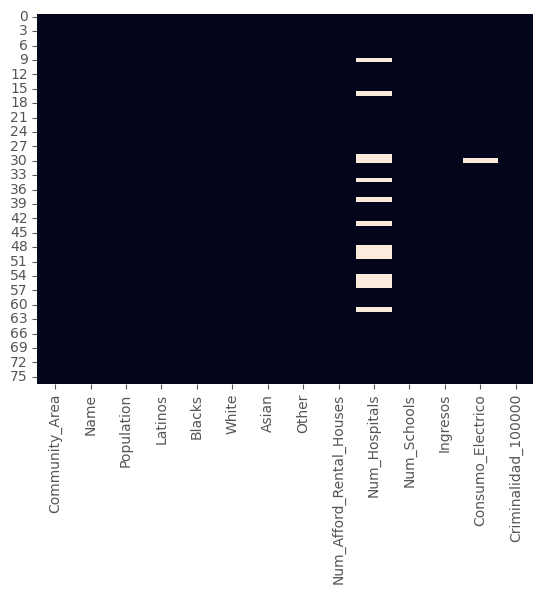

In [203]:
import seaborn as sns

# Se identifican los missing values visualmente
sns.heatmap(df1.isnull(), cbar = False)
plt.show()

In [204]:
# Valores nulos por columna
df1.isnull().sum()

Community_Area               0
Name                         0
Population                   0
Latinos                      0
Blacks                       0
White                        0
Asian                        0
Other                        0
Num_Afford_Rental_Houses     0
Num_Hospitals               14
Num_Schools                  0
Ingresos                     0
Consumo_Electrico            1
Criminalidad_100000          0
dtype: int64

* 14 valores nulos en la columna **"Num_Hospitals"**.
* 1 valor nulo en la columna **"Consumo_Electrico "**.
 

In [205]:
# Se observa el registro que tiene NaN en "Consumo_Electrico"
df1[df1.isnull().any(axis=1)]

,Community_Area,Name,Population,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
9,11,Jefferson Park,25448,4936.912,254.480,17482.776,2264.872,534.408,1,NaN,11,4,Medio Bajo,341.874
16,18,Montclare,13426,7250.040,604.170,5034.750,375.928,161.112,6,NaN,9,3,Bajo,320.274
29,31,Lower West Side,35769,29473.656,1108.839,4435.356,357.690,357.690,15,NaN,9,2,Medio Bajo,575.918
30,32,Loop,29283,2020.527,3367.545,18360.441,4655.997,907.773,2,NaN,4,4,NaN,1994.331
34,36,Oakland,5918,88.770,5568.838,124.278,35.508,106.524,18,NaN,9,1,Medio Bajo,878.675
38,40,Washington Park,11717,105.453,11365.490,82.019,11.717,140.604,18,NaN,4,1,Medio Bajo,1928.821
43,45,Avalon Park,10185,152.775,9747.045,81.480,20.370,183.330,1,NaN,8,3,Medio Bajo,922.926
48,50,Pullman,7325,571.350,6123.700,520.075,7.325,102.550,1,NaN,7,2,Medio,1119.454
49,51,South Deering,15109,4804.662,9352.471,725.232,15.109,196.417,1,NaN,3,2,Medio Bajo,1078.827
50,52,East Side,23042,18064.928,783.428,3963.224,46.084,161.294,0,NaN,10,2,Bajo,464.369


### Inputaciones simples

Se completa los valores nulos de las columnas **"Num_Hospitals"** y **"Consumo_Electrico"** por valores estadísticos como la *media* y la *moda* respectivamente.

In [206]:
# Nulos de "Num_Hospitals" con la media
df1["Num_Hospitals"] = df1["Num_Hospitals"].fillna(df1["Num_Hospitals"].mean())

Ahora se observa cuál es el valor más frecuente de "Consumo_Electrico".

In [207]:
# Valor más frecuente de "Consumo_Electrico"
df1["Consumo_Electrico"].mode()

0    Medio Bajo
Name: Consumo_Electrico, dtype: object

In [208]:
df1["Consumo_Electrico"] = df1["Consumo_Electrico"].fillna(df1["Consumo_Electrico"].mode()[0])

Se verifica los cambios realizados:

In [209]:
# Valores nulos por columna
df1.isnull().sum()

Community_Area              0
Name                        0
Population                  0
Latinos                     0
Blacks                      0
White                       0
Asian                       0
Other                       0
Num_Afford_Rental_Houses    0
Num_Hospitals               0
Num_Schools                 0
Ingresos                    0
Consumo_Electrico           0
Criminalidad_100000         0
dtype: int64

Ya no se tiene valores nulos.

## 1.7 Tipos de variables

Observamos cuantas categorías tiene la columna **"Consumo_Electrico"**:

In [210]:
# Categorias de Consumo_Electrico
df1["Consumo_Electrico"].value_counts()

Medio Bajo    45
Bajo          20
Muy Alto       5
Medio          4
Medio Alto     3
Name: Consumo_Electrico, dtype: int64

Se puede ver que la variable "Consumo_Electrico" posee 5 valores posibles.

A continuación se detallan las razones por las que se cambiarán los tipos de algunas variables

- **Community_Area:** Será modificada al tipo categórica para poder verificar si todos los valores son únicos en un análisis de descripción.
- **Name:** Dado que se trata de un nombre, se transformará al formato de texto.
- **Num_Afford_Rental_Houses:** Dado que representa la cantidad de proyectos de casas asequibles y tiene un rango de valores bajos (0 - 47), se modificará al tipo int8.
- **Num_Hospitals:** Dado que es un número con un rango de valores bajo (0 - 4), se transformará al tipo categórica. Sin embargo, por el momento se mantendrá como int8 para visualizar los outliers en la sección 1.9 Outliers.
- **Num_Schools:** Al ser un número dentro de un rango de valores bajo (1 - 16), se modificará al tipo categórica. Sin embargo, por ahora se conservará como int8 para analizar los outliers en la sección 1.9 Outliers.
- **Consumo Eléctrico:** Dado que posee 5 valores posibles **(Bajo - Medio Bajo - Medio - Medio Alto - Muy Alto)**, se modificará al tipo categórica.
- **Ingresos:** Se convertirá al tipo categórica, ya que ahora clasifica a cada área comunitaria en 4 grupos (1 - 4) según sus ingresos.

Se cambia las columnas **"Community_Area"** y **"Consumo_Electrico"** a tipo **categórica**:

In [211]:
# A categóricas
df1["Community_Area"] = df1["Community_Area"].astype("category")
df1["Consumo_Electrico"] = df1["Consumo_Electrico"].astype("category")
df1["Ingresos"] = df1["Ingresos"].astype("category")

Para reducir costos computacionales se ha tomado la desición de cambiar **"Num_Afford_Rental_Houses"**, y por ahora, **"Num_Hospitals"** y **"Num_Schools"** a tipo **int8**. 

In [212]:
# A numéricas
df1["Num_Afford_Rental_Houses"] = df1["Num_Afford_Rental_Houses"].astype("int8")

# A numñericas, más adelante se cambiarán a categóricas
df1["Num_Hospitals"] = df1["Num_Hospitals"].astype("int8")
df1["Num_Schools"] = df1["Num_Schools"].astype("int8")

In [213]:
# # A texto 
# df1["Name"] = df1["Name"].astype("string")

Se verifica los cambios realizados hasta ahora en los tipos de variables:

In [214]:
df1.dtypes

Community_Area              category
Name                          object
Population                     int64
Latinos                      float64
Blacks                       float64
White                        float64
Asian                        float64
Other                        float64
Num_Afford_Rental_Houses        int8
Num_Hospitals                   int8
Num_Schools                     int8
Ingresos                    category
Consumo_Electrico           category
Criminalidad_100000          float64
dtype: object

Valores únicos de la columna **"Community_Area"**:

In [215]:
df1.describe(include = 'all')

,Community_Area,Name,Population,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
count,77.0,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77,77.000000
unique,76.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5,NaN
top,59.0,McKinley Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Medio Bajo,NaN
freq,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,45,NaN
mean,NaN,NaN,33782.207792,10021.018221,11281.237922,10115.284338,1807.272870,555.236805,7.038961,0.480519,8.259740,NaN,NaN,932.729766
std,NaN,NaN,21679.849682,13713.559306,14747.056590,13049.823000,2990.304281,516.032525,10.103988,0.897517,3.062518,NaN,NaN,1171.466340
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,178.779000
25%,NaN,NaN,18001.000000,566.292000,833.612000,520.075000,47.130000,183.330000,1.000000,0.000000,6.000000,NaN,NaN,389.870000
50%,NaN,NaN,30654.000000,4333.912000,6123.700000,4232.274000,287.567000,401.236000,3.000000,0.000000,9.000000,NaN,NaN,594.137000
75%,NaN,NaN,45368.000000,14306.110000,17287.515000,15050.264000,2316.226000,629.944000,7.000000,1.000000,10.000000,NaN,NaN,1119.454000


Como la columna **"Community_Area"** y **"Name"** tienen 1 valor que se repite una sola vez, se deduce que deben haber dos registros para la zona comunitaria *McKinley Park*.

## 1.8 Columnas irrelevantes

* **"Community_Area":** Se elimina esta columna ya que tiene todos valores únicos y actúa como clave identificatória.

In [216]:
# Se elimina la columna "Community_Area"
df1=df1.drop(columns = "Community_Area")

# Dataframe sin la columna "Comunity_Area"
df1

,Name,Population,Latinos,Blacks,White,Asian,Other,Num_Afford_Rental_Houses,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,Rogers Park,54991,13417.804,14462.633,21611.463,3519.424,1979.676,10,0,9,2,Medio Bajo,525.541
1,West Ridge,71942,14676.168,7985.562,30719.234,16186.950,2302.144,6,0,10,3,Medio Bajo,316.922
2,Uptown,56362,8003.404,11272.400,29082.792,6425.268,1578.136,33,4,8,2,Medio,565.984
3,Lincoln Square,39493,7543.163,1500.734,24920.083,4383.723,1145.297,6,3,9,4,Medio Bajo,357.025
4,North Center,31867,4333.912,732.941,24633.191,1434.015,701.074,5,0,10,4,Medio Bajo,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Washington Heights,26493,264.930,25804.182,132.465,0.000,317.916,3,0,10,2,Bajo,860.605
73,Mount Greenwood,19093,1374.696,992.836,16419.980,133.651,190.930,0,0,9,4,Medio Bajo,319.489
74,Morgan Park,22544,608.688,15036.848,6470.128,90.176,315.616,0,0,8,4,Medio Bajo,660.930
75,O'Hare,12756,1211.820,408.192,9847.632,1058.748,242.364,0,0,7,3,Muy Alto,870.179


* Se eliminan las columnas **"Num_Afford_Rental_Houses", "Asian" y "Other"** ya que posiblemente no aporten información al momento de predecir la variable objetivo. La columna **"Name"** se eliminará al final del apartado *1.12 Filas duplicadas* para poder observar cual es el Area comunitaria que se repite.


* Se elimina la columna **"Population"** ya que puede sesgar el modelo.

In [217]:
# Eliminar columnas mencionadas
df1.drop(columns=["Num_Afford_Rental_Houses", 
                  "Asian", 
                  "Other",
                  "Population"
                  ], 
         inplace=True, axis=1)

df1.head()

,Name,Latinos,Blacks,White,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,Rogers Park,13417.804,14462.633,21611.463,0,9,2,Medio Bajo,525.541
1,West Ridge,14676.168,7985.562,30719.234,0,10,3,Medio Bajo,316.922
2,Uptown,8003.404,11272.400,29082.792,4,8,2,Medio,565.984
3,Lincoln Square,7543.163,1500.734,24920.083,3,9,4,Medio Bajo,357.025
4,North Center,4333.912,732.941,24633.191,0,10,4,Medio Bajo,310.666


Se observa la frecuencia de las categorías de la variable **"Consumo_Eléctrico"**: 

In [218]:
# Frecuencia de las categorías de Consumo_Electrico
df1["Consumo_Electrico"].value_counts(normalize = True)

Medio Bajo    0.584416
Bajo          0.259740
Muy Alto      0.064935
Medio         0.051948
Medio Alto    0.038961
Name: Consumo_Electrico, dtype: float64

La frecuencia de todas las categorías de dicha columna son superiores al 3 %. Por lo que se decide no realizar agrupaciones de ningún tipo por ahora.

## 1.9 Outliers

Primero se visualiza los outliers con las gráficas de cajas de todas las columnas.

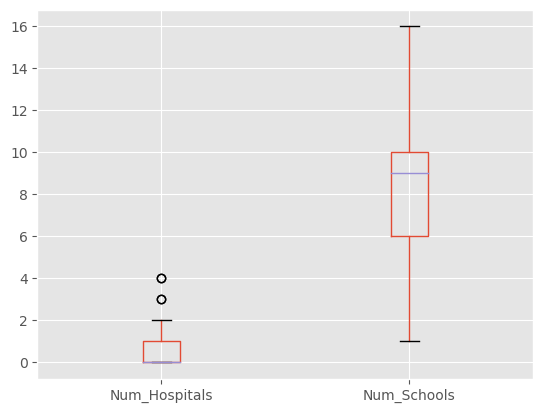

In [219]:
# Gráfico de cajas de columnas con el rango intermedio de valores
import matplotlib.pyplot as plt
df1[["Num_Hospitals", "Num_Schools"]].boxplot()
plt.show()

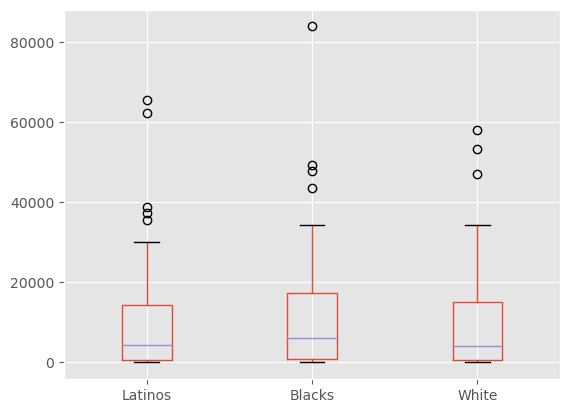

In [220]:
# Gráfico de cajas de columnas con el rango más bajo de valores 
import matplotlib.pyplot as plt
df1[["Latinos", "Blacks", "White"]].boxplot()
plt.show()

Luego se elimina todos los outliers con los rangos intercuartílicos

In [221]:
# # Cuartiles "Num_Hospitals"
# q1_Num_Hospitals = np.quantile(df1['Num_Hospitals'], 0.25)
# q3_Num_Hospitals = np.quantile(df1['Num_Hospitals'], 0.75)

# # Rango intercuartílico "Num_Hospitals"
# IQR_Num_Hospitals = q3_Num_Hospitals - q1_Num_Hospitals

# # Límites inferior y superior
# limite_inf_Num_Hospitals = q1_Num_Hospitals - 1.5 * IQR_Num_Hospitals
# limite_sup_Num_Hospitals = q3_Num_Hospitals + 1.5 * IQR_Num_Hospitals

# # Eliminamos los outliers
# df1.drop(df1[df1.Num_Hospitals < limite_inf_Num_Hospitals].index, inplace = True)
# df1.drop(df1[df1.Num_Hospitals > limite_sup_Num_Hospitals].index, inplace = True)

In [222]:
# # Cuartiles "Num_Schools"
# q1_Num_Schools = np.quantile(df1['Num_Schools'], 0.25)
# q3_Num_Schools = np.quantile(df1['Num_Schools'], 0.75)

# # Rango intercuartílico "Num_Schools"
# IQR_Num_Schools = q3_Num_Hospitals - q1_Num_Hospitals

# # Límites inferior y superior
# limite_inf_Num_Schools = q1_Num_Schools - 1.5 * IQR_Num_Schools
# limite_sup_Num_Schools = q3_Num_Schools + 1.5 * IQR_Num_Schools

# # Eliminamos los outliers
# df1.drop(df1[df1.Num_Schools < limite_inf_Num_Schools].index, inplace = True)
# df1.drop(df1[df1.Num_Schools > limite_sup_Num_Schools].index, inplace = True)

In [223]:
# # Cuartiles "White"
# q1_White = np.quantile(df1['White'], 0.25)
# q3_White = np.quantile(df1['White'], 0.75)

# # Rango intercuartílico "White"
# IQR_White = q3_White - q1_White

# # Límites inferior y superior
# limite_inf_White = q1_White - 1.5 * IQR_White
# limite_sup_White = q3_White + 1.5 * IQR_White

# # Eliminamos los outliers
# df1.drop(df1[df1.White < limite_inf_White].index, inplace = True)
# df1.drop(df1[df1.White > limite_sup_White].index, inplace = True)

In [224]:
# # Cuartiles "Blacks"
# q1_Blacks = np.quantile(df1['Blacks'], 0.25)
# q3_Blacks = np.quantile(df1['Blacks'], 0.75)

# # Rango intercuartílico "White"
# IQR_Blacks = q3_Blacks - q1_Blacks

# # Límites inferior y superior
# limite_inf_Blacks = q1_Blacks - 1.5 * IQR_Blacks
# limite_sup_Blacks = q3_Blacks + 1.5 * IQR_Blacks

# # Eliminamos los outliers
# df1.drop(df1[df1.Blacks < limite_inf_Blacks].index, inplace = True)
# df1.drop(df1[df1.Blacks > limite_sup_Blacks].index, inplace = True)

In [225]:
# # Cuartiles "Latinos"
# q1_Latinos = np.quantile(df1['Latinos'], 0.25)
# q3_Latinos = np.quantile(df1['Latinos'], 0.75)

# # Rango intercuartílico "White"
# IQR_Latinos = q3_Latinos - q1_Latinos

# # Límites inferior y superior
# limite_inf_Latinos = q1_Latinos - 1.5 * IQR_Latinos
# limite_sup_Latinos = q3_Latinos + 1.5 * IQR_Latinos

# # Eliminamos los outliers
# df1.drop(df1[df1.Latinos < limite_inf_Latinos].index, inplace = True)
# df1.drop(df1[df1.Latinos > limite_sup_Latinos].index, inplace = True)

In [226]:
df1.shape

(77, 9)

Pero al hacer esto, quedarían solo 43 registros.

Entonces, para preservar la mayor cantidad de información, se cambió el tratamiento de los Outliers y usar el LocalOutlierFactor que lo que hace es considerar como outliers los elementos que tienen una densidad más baja que el resto de los elementos del grupo de datos.

Se crea un dataframe con las columnas numéricas del dataframe original para aplicarle **LocalOutlierFactor**

In [227]:
# Se crea un dataframe numérico
df_num = df1[["Latinos", 
              "Blacks", 
              "White", 
              "Num_Schools", 
              "Ingresos", 
              "Num_Hospitals"
             ]
            ]

df_num

,Latinos,Blacks,White,Num_Schools,Ingresos,Num_Hospitals
0,13417.804,14462.633,21611.463,9,2,0
1,14676.168,7985.562,30719.234,10,3,0
2,8003.404,11272.400,29082.792,8,2,4
3,7543.163,1500.734,24920.083,9,4,3
4,4333.912,732.941,24633.191,10,4,0
...,...,...,...,...,...,...
72,264.930,25804.182,132.465,10,2,0
73,1374.696,992.836,16419.980,9,4,0
74,608.688,15036.848,6470.128,8,4,0
75,1211.820,408.192,9847.632,7,3,0


Se aplica **LocalOutlierFactor**:

In [228]:
# LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor

local_outLier_factor = LocalOutlierFactor()
local_outLier_factor.fit(df_num)
df_num["local_outLier"] = local_outLier_factor.fit_predict(df_num)

print(df_num["local_outLier"].value_counts())

# Se elimina las filas concideradas outliers
df_num.drop(df_num[(df_num['local_outLier'] == -1)].index, inplace=True)

 1    69
-1     8
Name: local_outLier, dtype: int64


Se detectan 8 outliers y se han eliminado.

## 1.10 Transformación de variables

## Numéricas

Se aplica **MinMaxScaler** solo a las columnas **"Latinos", "White"** y **"Blacks"**. 

In [229]:
# Se crea el dataframe al que se le aplicará MinMaxScaler
df_MMS = df1[["Latinos", 
              "Blacks", 
              "White"
             ]
            ]

# Se muestra el dataframe
df_MMS

,Latinos,Blacks,White
0,13417.804,14462.633,21611.463
1,14676.168,7985.562,30719.234
2,8003.404,11272.400,29082.792
3,7543.163,1500.734,24920.083
4,4333.912,732.941,24633.191
...,...,...,...
72,264.930,25804.182,132.465
73,1374.696,992.836,16419.980
74,608.688,15036.848,6470.128
75,1211.820,408.192,9847.632


In [230]:
# Se estandariza con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(df_MMS)
print(rescaledX)

[[2.04877343e-01 1.72512215e-01 3.72425449e-01]
 [2.24091387e-01 9.52528486e-02 5.29377605e-01]
 [1.22204509e-01 1.34458691e-01 5.01177171e-01]
 [1.15177058e-01 1.79009553e-02 4.29442149e-01]
 [6.61747910e-02 8.74261801e-03 4.24498204e-01]
 [5.48235226e-02 3.28857206e-02 9.15959210e-01]
 [6.02168623e-02 1.03682580e-01 1.00000000e+00]
 [1.33235738e-02 4.00320084e-04 1.70420206e-01]
 [6.78367984e-02 1.76646113e-03 5.19977317e-01]
 [7.53820382e-02 3.03547138e-03 3.01276721e-01]
 [3.24989867e-02 1.54536125e-03 2.37932354e-01]
 [4.92821340e-02 6.84426751e-03 1.52337426e-01]
 [3.88777126e-01 2.45919940e-02 2.59357792e-01]
 [3.79896087e-01 9.94343512e-03 5.91193391e-01]
 [3.71522409e-01 2.10036179e-02 3.83441328e-01]
 [1.52382475e-01 3.50119342e-03 5.08713683e-01]
 [1.10701344e-01 7.20662034e-03 8.67627070e-02]
 [9.48640036e-01 3.00562242e-02 2.06257965e-01]
 [3.33762557e-01 8.94967847e-03 3.27553668e-02]
 [3.86074196e-01 1.17080593e-02 1.92152457e-01]
 [5.69062721e-01 4.68860809e-02 4.917212

In [231]:
# Se crea otro dataframe 
df_MMS = pd.DataFrame(rescaledX,
                     columns = ["Latinos", "Blacks", "White"])

In [232]:
# Se muestra el dataframe
df_MMS

,Latinos,Blacks,White
0,0.204877,0.172512,0.372425
1,0.224091,0.095253,0.529378
2,0.122205,0.134459,0.501177
3,0.115177,0.017901,0.429442
4,0.066175,0.008743,0.424498
...,...,...,...
72,0.004045,0.307796,0.002283
73,0.020990,0.011843,0.282962
74,0.009294,0.179362,0.111498
75,0.018503,0.004869,0.169702


In [233]:
# Se eliminan las columnas "Latinos", "Blacks" y "White" del dataframe original
df1 = df1.drop(columns = ["Latinos", "Blacks", "White"])

In [234]:
# dataframe 
df1

,Name,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,Rogers Park,0,9,2,Medio Bajo,525.541
1,West Ridge,0,10,3,Medio Bajo,316.922
2,Uptown,4,8,2,Medio,565.984
3,Lincoln Square,3,9,4,Medio Bajo,357.025
4,North Center,0,10,4,Medio Bajo,310.666
...,...,...,...,...,...,...
72,Washington Heights,0,10,2,Bajo,860.605
73,Mount Greenwood,0,9,4,Medio Bajo,319.489
74,Morgan Park,0,8,4,Medio Bajo,660.930
75,O'Hare,0,7,3,Muy Alto,870.179


In [235]:
# Se concantena el dataframe original y el reescalado
df_concat = pd.concat([df_MMS, df1], axis=1)

# dataframe concatenado
df_concat

,Latinos,Blacks,White,Name,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,0.204877,0.172512,0.372425,Rogers Park,0,9,2,Medio Bajo,525.541
1,0.224091,0.095253,0.529378,West Ridge,0,10,3,Medio Bajo,316.922
2,0.122205,0.134459,0.501177,Uptown,4,8,2,Medio,565.984
3,0.115177,0.017901,0.429442,Lincoln Square,3,9,4,Medio Bajo,357.025
4,0.066175,0.008743,0.424498,North Center,0,10,4,Medio Bajo,310.666
...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,10,2,Bajo,860.605
73,0.020990,0.011843,0.282962,Mount Greenwood,0,9,4,Medio Bajo,319.489
74,0.009294,0.179362,0.111498,Morgan Park,0,8,4,Medio Bajo,660.930
75,0.018503,0.004869,0.169702,O'Hare,0,7,3,Muy Alto,870.179


## Categóricas

Aplicar **LabelEncoder** a la columna **"Consumo Electrico"**. 

Se transforma a numérico ordinal la variable **"Consumo_Electrico"** con **LabelEncoder**

In [236]:
# Importo el método preprocessing
from sklearn import preprocessing

# Se transforma a numérico (ordinal) la variable 
# "Consumo_Electrico" con la función LabelEncoder 
le = preprocessing.LabelEncoder()
le.fit(df_concat["Consumo_Electrico"])
le.classes_

# Se crea una copia del dataframe original, resguardandolo
df_concat_label_encoder = df_concat.copy()

# Se asigna valores numéricos ordinales a la variable
# Se almacena en una nueva variable
df_concat_label_encoder["Consumo_Electrico"] = le.transform(df_concat["Consumo_Electrico"])

# dataframe
display(df_concat_label_encoder)

,Latinos,Blacks,White,Name,Num_Hospitals,Num_Schools,Ingresos,Consumo_Electrico,Criminalidad_100000
0,0.204877,0.172512,0.372425,Rogers Park,0,9,2,3,525.541
1,0.224091,0.095253,0.529378,West Ridge,0,10,3,3,316.922
2,0.122205,0.134459,0.501177,Uptown,4,8,2,1,565.984
3,0.115177,0.017901,0.429442,Lincoln Square,3,9,4,3,357.025
4,0.066175,0.008743,0.424498,North Center,0,10,4,3,310.666
...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,10,2,0,860.605
73,0.020990,0.011843,0.282962,Mount Greenwood,0,9,4,3,319.489
74,0.009294,0.179362,0.111498,Morgan Park,0,8,4,3,660.930
75,0.018503,0.004869,0.169702,O'Hare,0,7,3,4,870.179


Se creca variables por cada una de sus opciones, para el resto de las columnas categóricas con **get_dummies**:

In [237]:
# get_dummies a la columna "Num_Schools"
df_concat_label_encoder1 = pd.concat([df_concat_label_encoder.drop("Num_Schools", axis = 1),
                                     pd.get_dummies(df_concat_label_encoder.Num_Schools)
                                    ], 
                                    axis = 1
                                   )

In [238]:
# get_dummies a la columna "Num_Hospitals"
df_concat_label_encoder1 = pd.concat([df_concat_label_encoder1.drop("Num_Hospitals", axis = 1),
                                     pd.get_dummies(df_concat_label_encoder.Num_Hospitals)
                                    ], 
                                    axis = 1
                                   )

In [239]:
# get_dummies a la columna "Ingresos"
df_concat_label_encoder1 = pd.concat([df_concat_label_encoder1.drop("Ingresos", axis = 1),
                                     pd.get_dummies(df_concat_label_encoder.Ingresos)
                                    ], 
                                    axis = 1
                                   )

In [240]:
#dataframe resultante
df_concat_label_encoder1

,Latinos,Blacks,White,Name,Consumo_Electrico,Criminalidad_100000,1,3,4,5,6,7,8,9,10,11,12,13,14,16,0,1,2,3,4,1,2,3,4
0,0.204877,0.172512,0.372425,Rogers Park,3,525.541,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.224091,0.095253,0.529378,West Ridge,3,316.922,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.122205,0.134459,0.501177,Uptown,1,565.984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.115177,0.017901,0.429442,Lincoln Square,3,357.025,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.066175,0.008743,0.424498,North Center,3,310.666,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,860.605,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
73,0.020990,0.011843,0.282962,Mount Greenwood,3,319.489,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
74,0.009294,0.179362,0.111498,Morgan Park,3,660.930,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
75,0.018503,0.004869,0.169702,O'Hare,4,870.179,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [241]:
# Se renombra las columnas una a una
df_concat_label_encoder1.columns = ['Latinos', 'Blacks', 'White', 'Name', 
                                   'Consumo_Eletrico', 'Criminalidad_100000', 
                                   'S1', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 
                                   'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S16', 
                                   'H0', 'H1', 'H2', 'H3', 'H4', 
                                   'I1', 'I2', 'I3', 'I4']

In [242]:
# dataframe
df_concat_label_encoder1

,Latinos,Blacks,White,Name,Consumo_Eletrico,Criminalidad_100000,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4
0,0.204877,0.172512,0.372425,Rogers Park,3,525.541,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.224091,0.095253,0.529378,West Ridge,3,316.922,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.122205,0.134459,0.501177,Uptown,1,565.984,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.115177,0.017901,0.429442,Lincoln Square,3,357.025,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.066175,0.008743,0.424498,North Center,3,310.666,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,860.605,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
73,0.020990,0.011843,0.282962,Mount Greenwood,3,319.489,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
74,0.009294,0.179362,0.111498,Morgan Park,3,660.930,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
75,0.018503,0.004869,0.169702,O'Hare,4,870.179,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [243]:
# Se intercambian las posiciones de las columnas "Consumo_Electrico" y "Criminalidad_100000".
df_concat_label_encoder1 = df_concat_label_encoder1.reindex(columns=['Latinos', 'Blacks', 'White', 
                                                                   'Name','Consumo_Eletrico', 
                                   'S1', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 
                                   'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S16', 
                                   'H0', 'H1', 'H2', 'H3', 'H4', 
                                   'I1', 'I2', 'I3', 'I4','Criminalidad_100000'])
# dataframe
df_concat_label_encoder1

,Latinos,Blacks,White,Name,Consumo_Eletrico,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4,Criminalidad_100000
0,0.204877,0.172512,0.372425,Rogers Park,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,525.541
1,0.224091,0.095253,0.529378,West Ridge,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,316.922
2,0.122205,0.134459,0.501177,Uptown,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,565.984
3,0.115177,0.017901,0.429442,Lincoln Square,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,357.025
4,0.066175,0.008743,0.424498,North Center,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,860.605
73,0.020990,0.011843,0.282962,Mount Greenwood,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,319.489
74,0.009294,0.179362,0.111498,Morgan Park,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,660.930
75,0.018503,0.004869,0.169702,O'Hare,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,870.179


## 1.11 Selección de variables

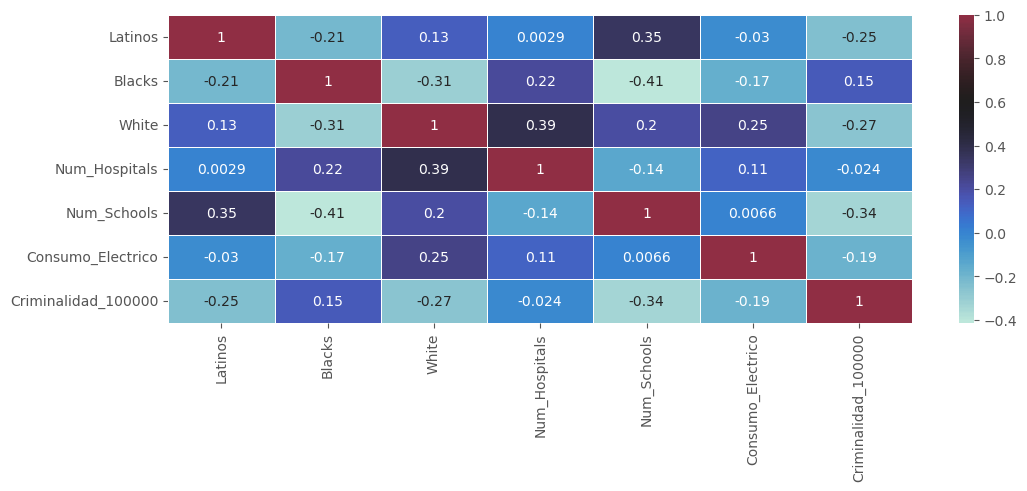

In [245]:
# Se crea la gráfica de mapa de calor mostrando la correlación de Pearson entre las variables cuantitativas
plt.figure(figsize = (12,4))
sns.heatmap(df_concat_label_encoder.corr(), annot = True, 
            center = 0.6, linewidths = 0.7, linecolor = "white")
plt.show()

## 1.12 Filas duplicadas

Para evitar que se generen filas duplicadas conforme se transforman los datos, se decide realizar esta tarea justo antes de entrenar el modelo.

📎 **Motivación:** Las filas duplicadas sesgan cualquier modelo predictivo, por lo que resulta imprescindible eliminarlas antes de realizar cualquier entrenamiento.

In [246]:
# Filas duplicadas
df_concat_label_encoder1.duplicated().sum()

0

No hay filas duplicadas. 

Registros del Area comunitaria que se repite:

In [248]:
lista = ["McKinley Park"]
df_concat_label_encoder1.loc[df_concat_label_encoder["Name"].isin(lista)]

,Latinos,Blacks,White,Name,Consumo_Eletrico,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4,Criminalidad_100000
57,0.154471,0.002793,0.046006,McKinley Park,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,570.074
58,0.000000,0.000000,0.000000,McKinley Park,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,9999.000


El registro que corresponde al Area comunitaria *McKinley Park* tiene población 0. Este debe ser el valor que llamaba la atención al princípio, por lo que se procede a eliminarlo de la siguiente manera en función de su índice.	

In [249]:
# Se elimina la fila 58 del dataframe
df_concat_label_encoder1.drop([58], axis = 0, inplace=True)

In [250]:
df_concat_label_encoder1

,Latinos,Blacks,White,Name,Consumo_Eletrico,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4,Criminalidad_100000
0,0.204877,0.172512,0.372425,Rogers Park,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,525.541
1,0.224091,0.095253,0.529378,West Ridge,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,316.922
2,0.122205,0.134459,0.501177,Uptown,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,565.984
3,0.115177,0.017901,0.429442,Lincoln Square,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,357.025
4,0.066175,0.008743,0.424498,North Center,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,Washington Heights,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,860.605
73,0.020990,0.011843,0.282962,Mount Greenwood,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,319.489
74,0.009294,0.179362,0.111498,Morgan Park,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,660.930
75,0.018503,0.004869,0.169702,O'Hare,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,870.179


Ahora si se procede a eliminar la columna **"Name"**:

In [251]:
# Se elimina la columna la columna "Name"
df_concat_label_encoder1.drop(columns=["Name"], inplace = True) 

In [252]:
#  dataframe
df_concat_label_encoder1

,Latinos,Blacks,White,Consumo_Eletrico,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4,Criminalidad_100000
0,0.204877,0.172512,0.372425,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,525.541
1,0.224091,0.095253,0.529378,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,316.922
2,0.122205,0.134459,0.501177,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,565.984
3,0.115177,0.017901,0.429442,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,357.025
4,0.066175,0.008743,0.424498,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,860.605
73,0.020990,0.011843,0.282962,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,319.489
74,0.009294,0.179362,0.111498,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,660.930
75,0.018503,0.004869,0.169702,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,870.179


## 2. Modelo

In [253]:
# Se renombra el dataframe
df2 = df_concat_label_encoder1

In [254]:
# dataframe
df2

,Latinos,Blacks,White,Consumo_Eletrico,S1,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S16,H0,H1,H2,H3,H4,I1,I2,I3,I4,Criminalidad_100000
0,0.204877,0.172512,0.372425,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,525.541
1,0.224091,0.095253,0.529378,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,316.922
2,0.122205,0.134459,0.501177,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,565.984
3,0.115177,0.017901,0.429442,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,357.025
4,0.066175,0.008743,0.424498,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,310.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004045,0.307796,0.002283,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,860.605
73,0.020990,0.011843,0.282962,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,319.489
74,0.009294,0.179362,0.111498,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,660.930
75,0.018503,0.004869,0.169702,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,870.179


Ya se tiene los datos de entrada estandarizados, explorados y limpios.

Se crea un modelo **RandomForestRegressor**:

In [268]:
#Importamos librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Seleccionamos las columnas predictoras y target
X = df2.loc[:,~df2.columns.isin(['Criminalidad_100000'])]
Y = df2.loc[:,'Criminalidad_100000']

# Dividimos los datos en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 42)

# Creamos el modelo y lo entrenamos
# Bajamos la profundidad a 5 porque sobreajustaba
model = RandomForestRegressor(n_estimators = 40, max_depth = 9, 
                              random_state = 0) 
model.fit(X_train,Y_train)

# Predecimos con los valores de prueba
Y_pred = model.predict(X_test)

# Mostramos el resultado de la predicción y los reales
print("Predicción: ", Y_pred, "\n")
print("real:", Y_test.values, "\n")

# Puntuación del modelo
print("Prediccion train: ", model.score(X_train, Y_train))
print("Prediccion test: ",metrics.r2_score(Y_test, Y_pred), "\n")

# Error cuadrático medio
mse = mean_squared_error(Y_test, Y_pred)
print("Error cuadrático medio:", mse)

# Error absoluto medio
mae = mean_absolute_error(Y_test, Y_pred)
print("Error absoluto medio:", mae, "\n")

# Feature importance
print("Importancia de cada variable", "\n")
for col, pred in zip(X_train.columns,model.feature_importances_):
    if 0.019 < pred:
        print(f"{col} : {pred} ")

Predicción:  [ 340.05266486 1236.7998      375.07778125  626.58105208  885.2208
 1130.879975   1463.515675    394.13810417  462.34643631  671.64696875
 1637.584375    564.48784778  506.05697262  455.03209715  351.1377784
  743.362175  ] 

real: [ 310.666 2260.083  210.72   525.541 1577.503 1017.504 1515.28   350.095
  464.369  456.563 1699.282  294.499  483.806  353.11   356.506 1025.332] 

Prediccion train:  0.9407955733102189
Prediccion test:  0.7008358831425756 

Error cuadrático medio: 112206.72195525092
Error absoluto medio: 198.7398389967758 

Importancia de cada variable 

Latinos : 0.06620510297563414 
Blacks : 0.16299696891124102 
White : 0.2939623321146523 
Consumo_Eletrico : 0.02161220234509781 
S4 : 0.16066982997986987 
I1 : 0.23858391745943489 


Hay una distancia promedio de 198,74 entre los valores predichos y los reales.

## 3. Anexo - Respuestas

## Ejercicio 1

* **¿Creéis que tiene sentido cambiar el tipo de dato de alguna variable?**

 
* **Community_Area**: Se modifica a tipo categórica para poder ver en un describe si son todos valores únicos.
* **Name**: Al ser un nombre, se modifica a formato texto.
* **Num_Afford_Rental_Houses**: Por ser un número de proyectos de casas asequible y por tener un rango de valores bajos (0 - 47) debe ser modificada como int8.
* **Num_Hospitals**: Al ser un número dentro de una rango de valores bajo (0 - 4) debe ser modificada como tipo int8.
* **Num_Schools**: Al ser un número dentro de una rango de valores bajo (1 - 16) debe ser modificada como tipo int8.
* **Consumo Electrico**: Al poseer 5 valores posibles (**Bajo** - **Medio Bajo** - **Medio** - **Medio Alto** - **Muy Alto**) debe ser modificada como tipo categórica.

* **¿Existen filas duplicadas?**

Primero no se encontró filas duplicadas con *df1_label_encoder.duplicated().sum()*

* **¿Seguro que no existen más filas que quizás no estén bien y debiéramos borrar?**

Luego con un *describe* se observa que tanto la columna **Name** como **Comunity_Area** tenían todos valores únicos excepto en una fila, se buscó esa fila y se observó que habian dos registros de la misma área, uno de esos registros contenía el outlier de **Criminalidad_100000** y el valor 0 de **Population**. 

* **¿Observáis algo atípico a través la graficación de las variables?**

Con el mapa de calor de seaborn se visualizó mejor los valores nulos que hay en los datos. 

Con las gráficas de pares de seaborn se observó que existe una marcada correlación entre las variables **"Population"**, **"Ingresos"**, **"Blacks"**, **"White"** y **"Num_Schools"** con la **target**. 

Además, en todas las gráficas se puede observar el outlier (9999) de la variable objetivo como un punto por encima del resto.

Con los gráficos de caja, se observó que habían outliers en las variables **"Num_Hospitals"**, **"Latinos"** y en **"Blacks"** y **"White"**. 

## Ejercicio 2

* **¿Qué tipo de problema analítico tenéis?**

En cuanto al tipo de problema analítico que se tiene, se ha llegado a la conclusión de que se trata de un problema de regresión. Esto se basa en la naturaleza de los valores numéricos con los que están trabajando, y han identificado que pueden calcular un valor futuro. La variable objetivo que han seleccionado para este análisis es 'Criminalidad_100000'

* **¿Extraéis alguna conclusión relevante?**

Se indentifica que existe una marcada correlación entre las variables "Population", "Ingresos", "Blacks", "White" y "Num_Schools" con la target.

Además se observa que para el modelo son muy importantes las variables **"Blacks"**, **"White"**, **"S4"**, es decir, que hayan 4 escuelas y **"I1"**, es decir, que un area comunitaria tenga un ingreso medio per cápita menor a 32553. 

* **¿Qué selección de variables habéis considerado?**
    - **Name:** Se consideró no eliminarla, ya que puede aportar información para el modelo.
    - **Community_Area:** Se elimina esta columna, ya que tiene todos valores únicos y actúa como clave identificatoria.
    - **Population:** Se decide eliminarla ya que podía sesgar el modelo.
    - **Latinos, Black, White** Estas variables serian parte importante en la predicción, ya que además de que se pudo visualizar su marcada correlación con la variable objetivo, podría afectar al índice de criminalidad las costumbres, normas y culturas de cada raza étnica.
    - **Num Afford Rental Houses:** Podría ser importante ya que una zona con en donde hay una amplia posibilidad de comprar viviendas se interpreta como una zona de nuevas construcciones, pocos habitantes,de desplazamientos (mundanzas). 
    - **Num Hospitals:** El número de hospitales, ya que es importante para predecir la criminalidad.
    - **Num Schools:** La variable podría cambiar dependiendo las cultura, podría aumentar o disminuir el índice de criminalidad.
    - **Ingresos:** Depende la población o etnia o raza de ingreso, puede afectar la zona a la que ingresaron
    - **Consumo Electrico:** A más consumo eléctrico la variable puede cambiar a menos criminalidad si es una zona residencial,  o en caso de ser zona comercial incluso ser más alta por ser lugares frecuentes para hurtos, es una variable determinante en nuestra predicción vista de diferentes posibilidades.
    - **Criminalidad 100000:** Este es la variable objetivo.



* **Validad el modelo atendiendo a distintas métricas de error. ¿Qué conclusión extraéis?**

    - El MSE primero dio 112206, se podría seguir disminuyendo para poder llegar a un modelo que prediga mejor.  

    - El MAE  dio 198, es decir que los valores predichos tienen una distancia promedio de 198, se podría intentar disminuir esta cantidad mediante un cambio en los datos que ingiere el modelo.

    - El valor r2.score dió un 70 % de acierto por lo que se interpreta que el modelo predice bien. 